In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [9]:
Auto=load_data("Auto")

X=pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                'horsepower': Auto['horsepower']})
y = Auto['mpg']

model = sm.OLS(y, X)
results=model.fit()

summarize(results)



,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### 8a

i) yes, slope is -0.158. P-value close to 0.
ii)
iii) negative



In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        07:51:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results.get_prediction(exog=[1,98]).summary_frame()


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### 8a

iv) 24.46 mpg, confidence interval: 23.97 - 24.96, prediction interval: 14.81 - 34.12



C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_10316\2100871017.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)


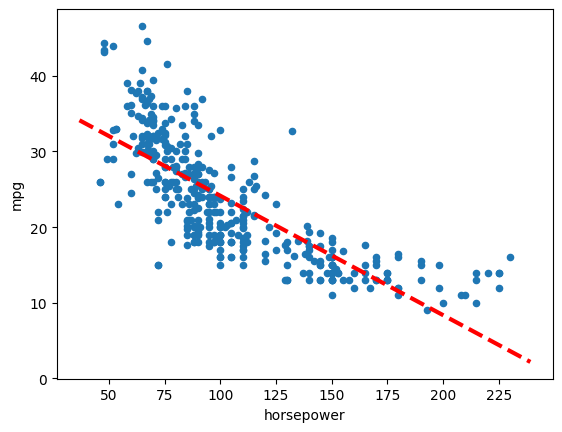

In [16]:
def abline(ax, b, m, *args, **kwargs):
    # add a line with slope m and intercept b to ax
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

### 8b

Se ovan


<function matplotlib.pyplot.show(close=None, block=None)>

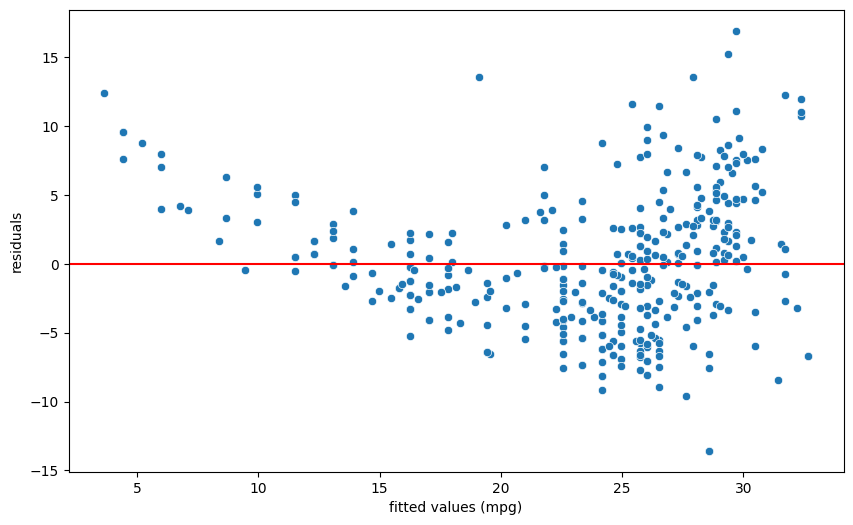

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted_values = results.fittedvalues
residuals=results.resid

plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red')
plt.ylabel('residuals')
plt.xlabel('fitted values (mpg)')
plt.show

### 8c

Residuals avviker ojämnt, det borde vara samma varians över hela grafen